In [1]:
#Connect to drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/DI725/DI725-project

Mounted at /content/drive
/content/drive/MyDrive/DI725/DI725-project


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
captions = pd.read_csv("RISCM/captions.csv")
captions.head()

,source,split,image,caption_1,caption_2,caption_3,caption_4,caption_5
0,NWPU,test,NWPU_31430.jpg,A gray plane on the runway and the lawn beside .,A grey plane is on the runway by the lawn .,There is an airplane on the runway with a larg...,A plane is parked on the runway next to the gr...,There is a plane on the runway beside the grass .
1,NWPU,test,NWPU_31431.jpg,Three small planes parked in a line on the air...,"There are four aircraft on the open ground, Th...",There are many planes of different sizes in a ...,Four planes are parked on the runway .,Four planes of different sizes were on the mar...
2,NWPU,test,NWPU_31432.jpg,A plane parked in a line on the airport with s...,A white plane was parked on the instruction li...,An airplane parked in an open area with many c...,A plane is parked on the open space .,There is 1 plane on the ground marked .
3,NWPU,test,NWPU_31433.jpg,A small plane and a big plane parked next to b...,A white plane and a gray plane parked at the b...,Two planes of different sizes are neatly parke...,A large plane and a small plane are parked nea...,Two planes are on the marked ground .
4,NWPU,test,NWPU_31434.jpg,Two planes parked next to boarding bridges .,Two aircraft were parked at the departure gates .,Two planes of different sizes are neatly parke...,Two planes are parked next to the terminal .,Two planes are on the marked ground .


In [4]:
captions.split.value_counts()

,count
split,
train,35614
test,4454
val,4453


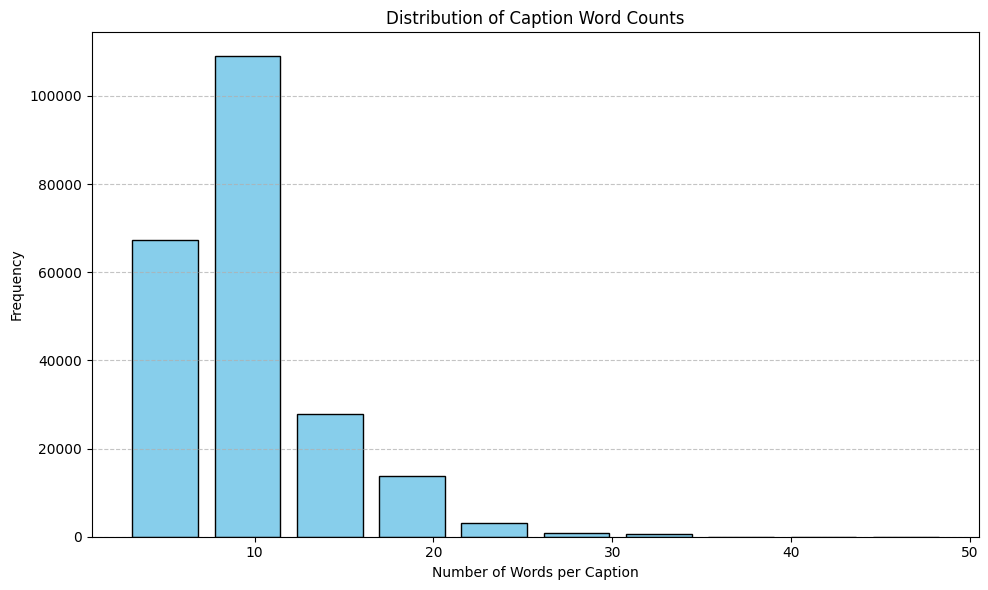

In [5]:
# caption word length distributions

caption_lens = []

for i in range(len(captions)):
  for j in range(3, 8):
    caption_lens.append(len(captions.iloc[i, j].split()))

#histogram
plt.figure(figsize=(10, 6))
plt.hist(caption_lens, align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xlabel('Number of Words per Caption')
plt.ylabel('Frequency')
plt.title('Distribution of Caption Word Counts')

plt.grid(axis='y', alpha=0.75, linestyle='--')

plt.tight_layout()
plt.show()


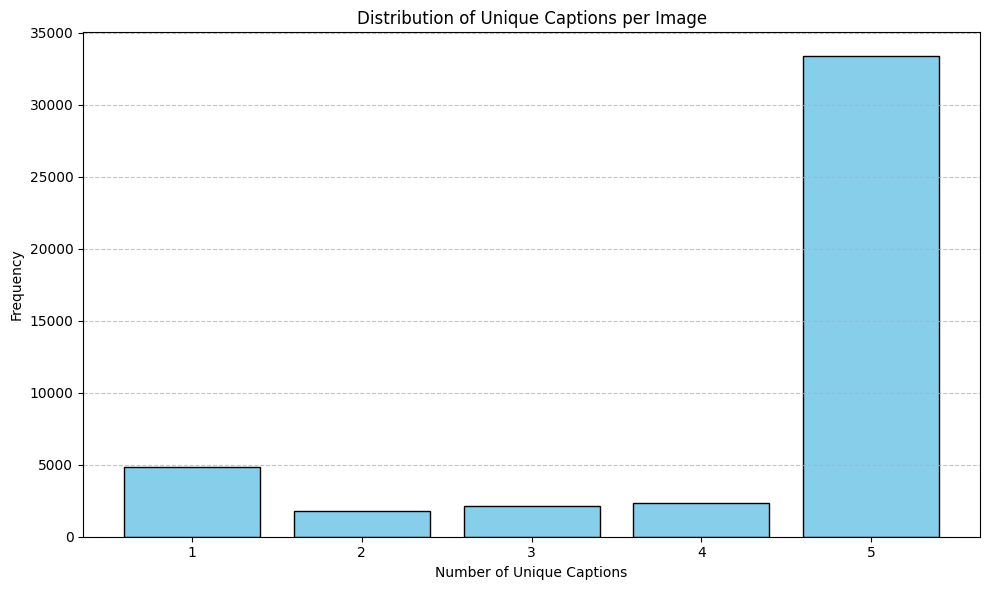

Percent of images with all unique captions: 74.93991599469913%


In [6]:
#distribution of unique captions per image

unique_captions_per_image = []
for i in range(len(captions)):
  n_unique = len(captions.iloc[i, 3:8].unique())
  unique_captions_per_image.append(n_unique)

#histogram
plt.figure(figsize=(10, 6))
plt.hist(unique_captions_per_image, bins=range(1, 7), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xlabel('Number of Unique Captions')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Captions per Image')
plt.xticks(range(1, 6))

plt.grid(axis='y', alpha=0.75, linestyle='--')

plt.tight_layout()
plt.show()

# percent of full images with all unique
n_full_captions = 0
for image in unique_captions_per_image:
  if image == 5:
    n_full_captions += 1

percent = (n_full_captions / len(unique_captions_per_image)) * 100
print(f"Percent of images with all unique captions: {percent}%")


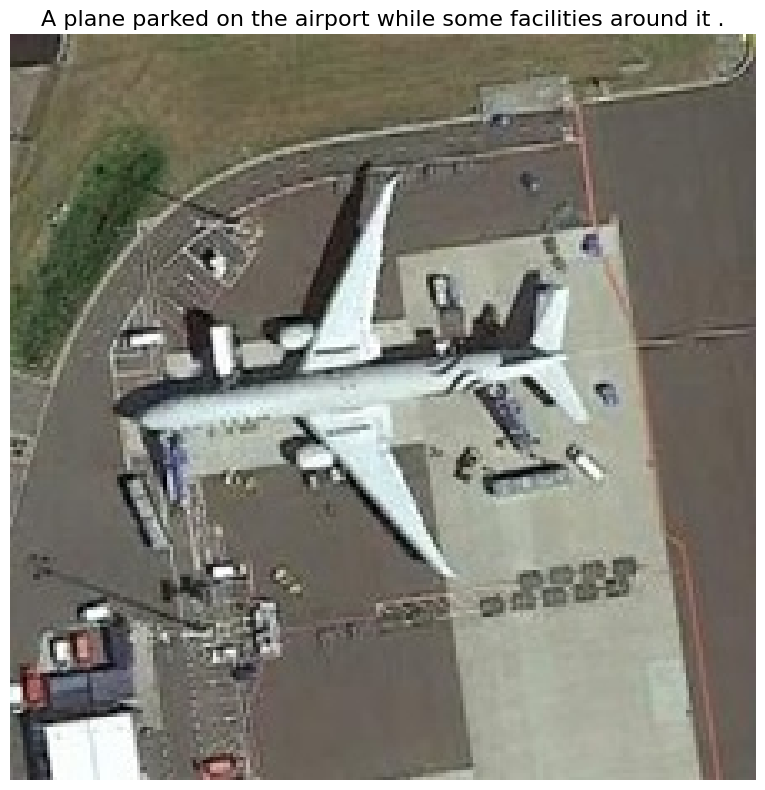

In [8]:
index = 42

image_path = f"RISCM/resized/{captions.iloc[index,2]}"
caption = captions.iloc[index, 3]
img = Image.open(image_path)

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title(caption, fontsize=16)
plt.tight_layout()
plt.show()

